In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

C:\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


## 构造数据点

In [2]:
# 随机生成1000个点，围绕在y=0.1x + 0.3这条直线周围
num_points = 1000
vectors_set = []
for i in range(num_points):
    x1 = np.random.normal(0.0,0.55)
    y1 = x1 * 0.1 + 0.3 + np.random.normal(0.0,0.03)
    vectors_set.append([x1,y1])

In [3]:
np.random.normal(0,1)

-0.056198574001145495

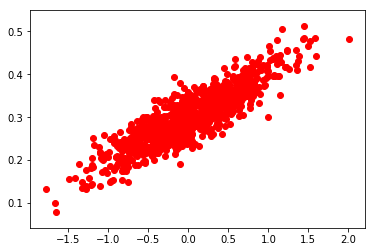

In [4]:
# 生成一些样本
x_data = [v[0] for v in vectors_set]
y_data = [v[1] for v in vectors_set]
plt.scatter(x_data,y_data,c="r")
plt.show()

## 线性回归建模  
1、初始化w，b  

2、生成预测值y  
 
3、构造损失函数  

4、构造损失函数优化器(指定优化方法：梯度下降)  

5、通过优化器最小化损失函数来构造训练对象

6、创建tf会话，运行初始化全局变量，运行训练对象（需设置循次数）


In [5]:
# 生成1维的W矩阵，取值是[-1,1]之间的随机数
W = tf.Variable(tf.random_uniform([1], -1.0, 1.0), name='W')
# 生成1维的b矩阵，初始值是0
b = tf.Variable(tf.zeros([1]), name='b')
# 经过计算得出预估值y
y = W * x_data + b

# 以预估值y和实际值y_data之间的均方误差作为损失
loss = tf.reduce_mean(tf.square(y - y_data), name='loss')
# 采用梯度下降法来优化参数
optimizer = tf.train.GradientDescentOptimizer(0.5) # 0.5指学习率
# 训练的过程就是最小化这个误差值
train = optimizer.minimize(loss, name='train')

sess = tf.Session()

init = tf.global_variables_initializer()
sess.run(init)

# 初始化的W和b是多少
print ("W =", sess.run(W), "b =", sess.run(b), "loss =", sess.run(loss))
# 执行20次训练
for step in range(20):
    sess.run(train)
    # 输出训练好的W和b
    print ("W =", sess.run(W), "b =", sess.run(b), "loss =", sess.run(loss))
writer = tf.summary.FileWriter("./tmp", sess.graph)

W = [-0.66792274] b = [0.] loss = 0.2828858
W = [-0.42032087] b = [0.3054471] loss = 0.087651186
W = [-0.25397557] b = [0.30362225] loss = 0.041131113
W = [-0.14069468] b = [0.30239627] loss = 0.019557083
W = [-0.0635507] b = [0.3015614] loss = 0.00955197
W = [-0.01101585] b = [0.30099285] loss = 0.0049120253
W = [0.02476024] b = [0.30060565] loss = 0.0027602164
W = [0.04912367] b = [0.300342] loss = 0.0017622994
W = [0.06571509] b = [0.30016243] loss = 0.0012995078
W = [0.07701381] b = [0.30004016] loss = 0.001084885
W = [0.0847082] b = [0.29995686] loss = 0.0009853521
W = [0.08994807] b = [0.29990017] loss = 0.00093919295
W = [0.0935164] b = [0.29986155] loss = 0.0009177862
W = [0.09594642] b = [0.29983523] loss = 0.0009078588
W = [0.09760126] b = [0.29981732] loss = 0.00090325484
W = [0.09872821] b = [0.29980513] loss = 0.00090111984
W = [0.09949566] b = [0.29979685] loss = 0.00090012955
W = [0.10001829] b = [0.2997912] loss = 0.00089967035
W = [0.10037419] b = [0.2997873] loss = 0.

In [6]:
print(writer)

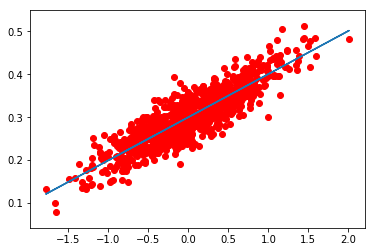

In [6]:
plt.scatter(x_data,y_data,c='r')
plt.plot(x_data,sess.run(W)*x_data+sess.run(b))
plt.show()